
<b>MLOps Assignment 2</b>
<br>
<b>Group : MlOps Group 76</b>
<br>
<b>Dataset Link : https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv</b>
<br>
<b>Group Members:</b>
<ul>
    <li><b>CHAUDHARI AAKASH VINAYAK (2022ac05607)</b></li>
    <li><b>AATIF HUSSAIN WAZA (2022ac05405)</b></li>
    <li><b>AJIT KUMAR YADAV (2022ac05720)</b></li>
    <li><b>MOHAMMAD ZUBAIR (2022ac05121)</b></li>
</ul>

# Install Libraries

In [26]:
!pip install h2o

# Import Libraries

In [27]:
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2OXGBoostEstimator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize H2O cluster

In [28]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9l_rjh40
  JVM stdout: /tmp/tmp9l_rjh40/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9l_rjh40/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_zpo2ki
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Load and prepare the Iris dataset

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Convert pandas DataFrame to H2OFrame

In [30]:
hf = H2OFrame(iris_df)
hf['species'] = hf['species'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Define the feature and target columns

In [31]:
x = iris.feature_names
y = 'species'

# Split the data into training and validation sets

In [32]:
train, valid = hf.split_frame(ratios=[0.8], seed=1234)

# Run H2O AutoML

In [33]:
aml = H2OAutoML(max_runtime_secs=300, seed=1234)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
16:03:08.409: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████
16:03:24.596: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

███████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240917_160308


GLM Model: summary
    family       link         regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 2.802E-4 )  nlambda = 30, lambda.max = 41.68, lambda.min = 2.802E-4, lambda.1se = 0.00117  15                            12                             101                     AutoML_1_20240917_160308_training_py_10_sid_95f5

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.010556935162211432
RMSE: 0.10274694721601918
LogLoss: 0.04155829022447387
Null degrees of freedom: 122
Residual degrees of freedom: 108
Null deviance: 268.75975696291414
Residual deviance: 10.223339395220572
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  -------
36   0    0    0          0 / 36
0    39   1    0.025      1 / 40
0    1    46   0.0212766  1 / 47
36   40   47   0.0162602  2 / 123

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.98374
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.027918872969837707
RMSE: 0.16708941609161757
LogLoss: 0.0869208517628034
Null degrees of freedom: 26
Residual degrees of freedom: 12
Null deviance: 62.64095022080041
Residual deviance: 4.693725995191383
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error     Rate
---  ---  ---  --------  ------
14   0    0    0         0 / 14
0    9    1    0.1       1 / 10
0    0    3    0         0 / 3
14   9    4    0.037037  1 / 27

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.962963
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.025525199476643726
RMSE: 0.15976607736513945
LogLoss: 0.08029708889626785
Null degrees of freedom: 122
Residual degrees of freedom: 108
Null deviance: 268.8675474164887
Residual deviance: 19.75308386848189
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error      Rate
---  ---  ---  ---------  -------
36   0    0    0          0 / 36
0    37   3    0.075      3 / 40
0    2    45   0.0425532  2 / 47
36   39   48   0.0406504  5 / 123

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.95935
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------- 

# Get the leaderboard

In [34]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id                                                mean_per_class_error    logloss      rmse        mse
GLM_1_AutoML_1_20240917_160308                                     0.0391844  0.0802971  0.159766  0.0255252
XGBoost_grid_1_AutoML_1_20240917_160308_model_15                   0.0391844  0.211914   0.2213    0.0489739
GBM_grid_1_AutoML_1_20240917_160308_model_41                       0.0404255  0.181516   0.208931  0.0436521
XGBoost_grid_1_AutoML_1_20240917_160308_model_16                   0.0404255  0.16196    0.195353  0.0381627
XGBoost_grid_1_AutoML_1_20240917_160308_model_29                   0.0404255  0.182995   0.210106  0.0441444
XGBoost_grid_1_AutoML_1_20240917_160308_model_22                   0.0404255  0.275401   0.262996  0.0691669
XGBoost_grid_1_AutoML_1_20240917_160308_model_14                   0.0404255  0.167819   0.199234  0.039694
XGBoost_grid_1_AutoML_1_20240917_160308_model_1                    0.0404255  0.227903   0.233957  0.054736
XGBoost_2_AutoML_1_20

# Plot the leaderboard

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


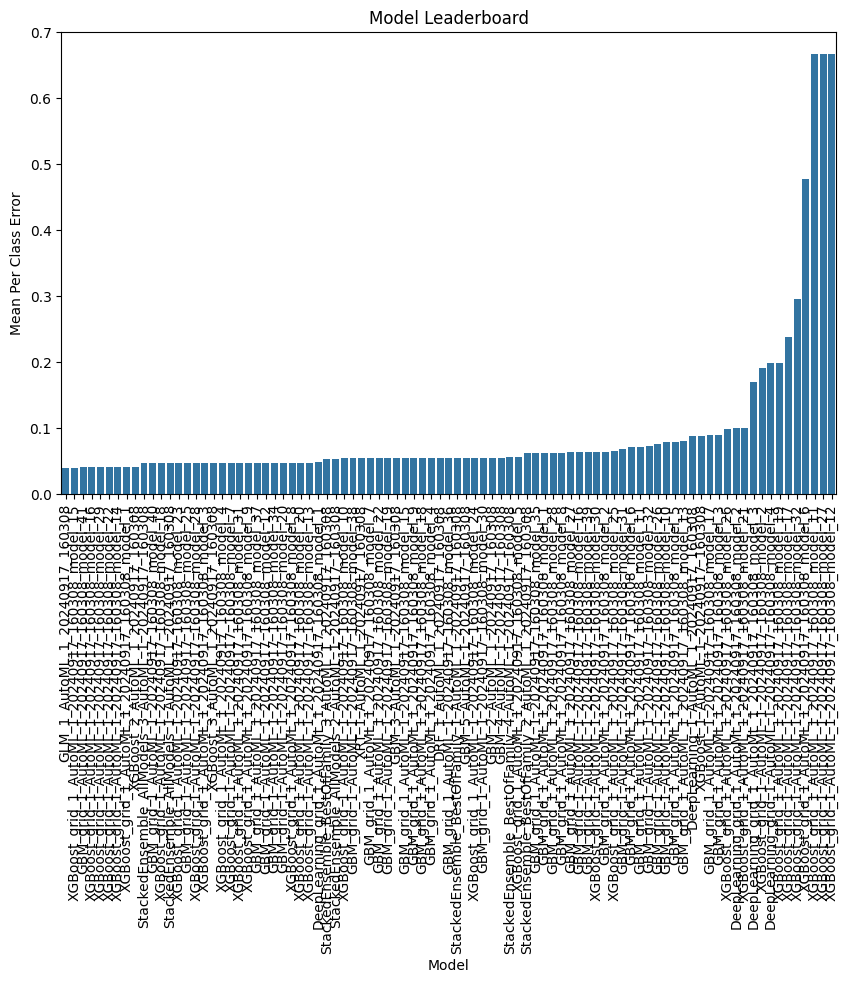

In [35]:
# Convert H2OFrame leaderboard to Pandas DataFrame
leaderboard_df = leaderboard.as_data_frame()

# Plot the leaderboard
plt.figure(figsize=(10, 6))
plt.title("Model Leaderboard")
sns.barplot(x='model_id', y='mean_per_class_error', data=leaderboard_df)
plt.xticks(rotation=90)
plt.xlabel("Model")
plt.ylabel("Mean Per Class Error")
plt.show()


# Get the best model

In [36]:
best_model = aml.leader
print(best_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240917_160308


GLM Model: summary
    family       link         regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 2.802E-4 )  nlambda = 30, lambda.max = 41.68, lambda.min = 2.802E-4, lambda.1se = 0.00117  15                            12                             101                     AutoML_1_20240917_160308_training_py_10_sid_95f5

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.0105569351

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_1_20240917_160308

0,1,2,Error,Rate
14.0,0.0,0.0,0.0,0 / 14
0.0,9.0,1.0,0.1,1 / 10
0.0,0.0,3.0,0.0,0 / 3
14.0,9.0,4.0,0.0370370,1 / 27


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

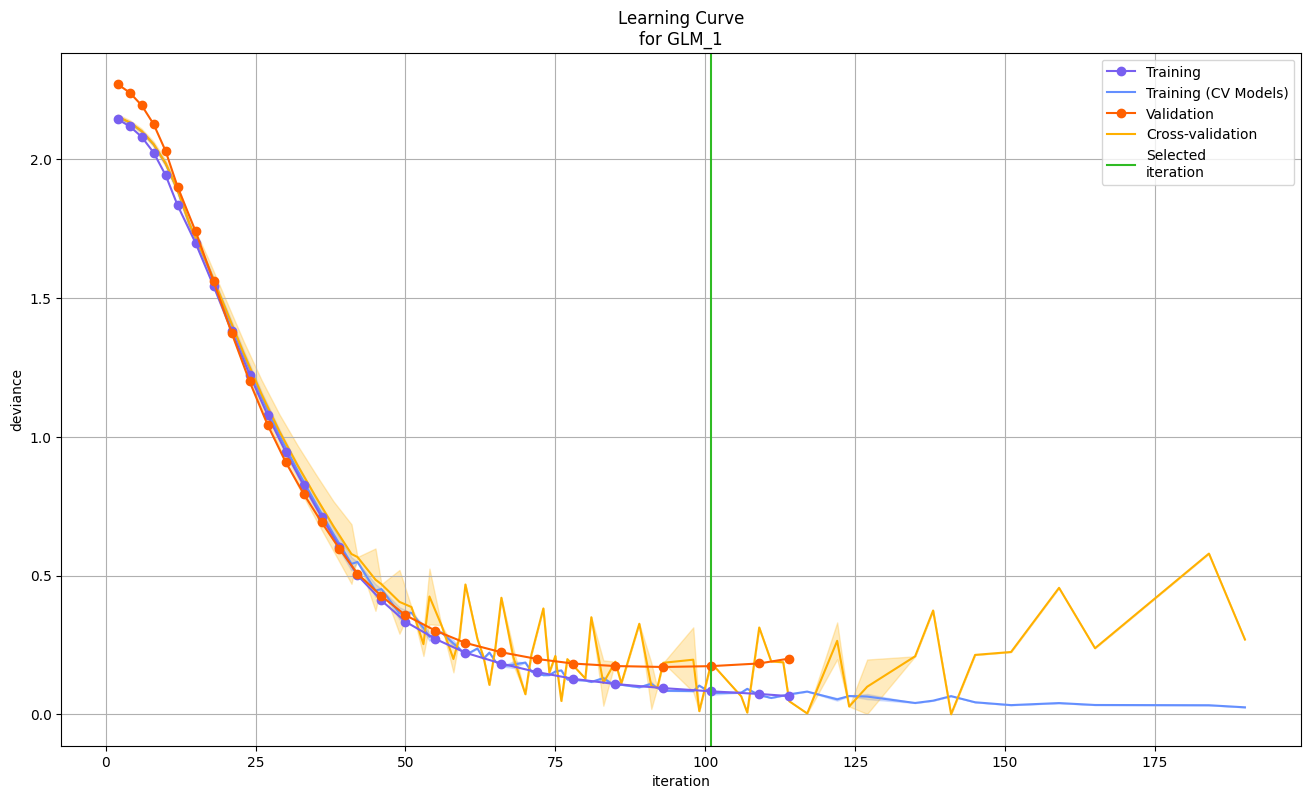

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

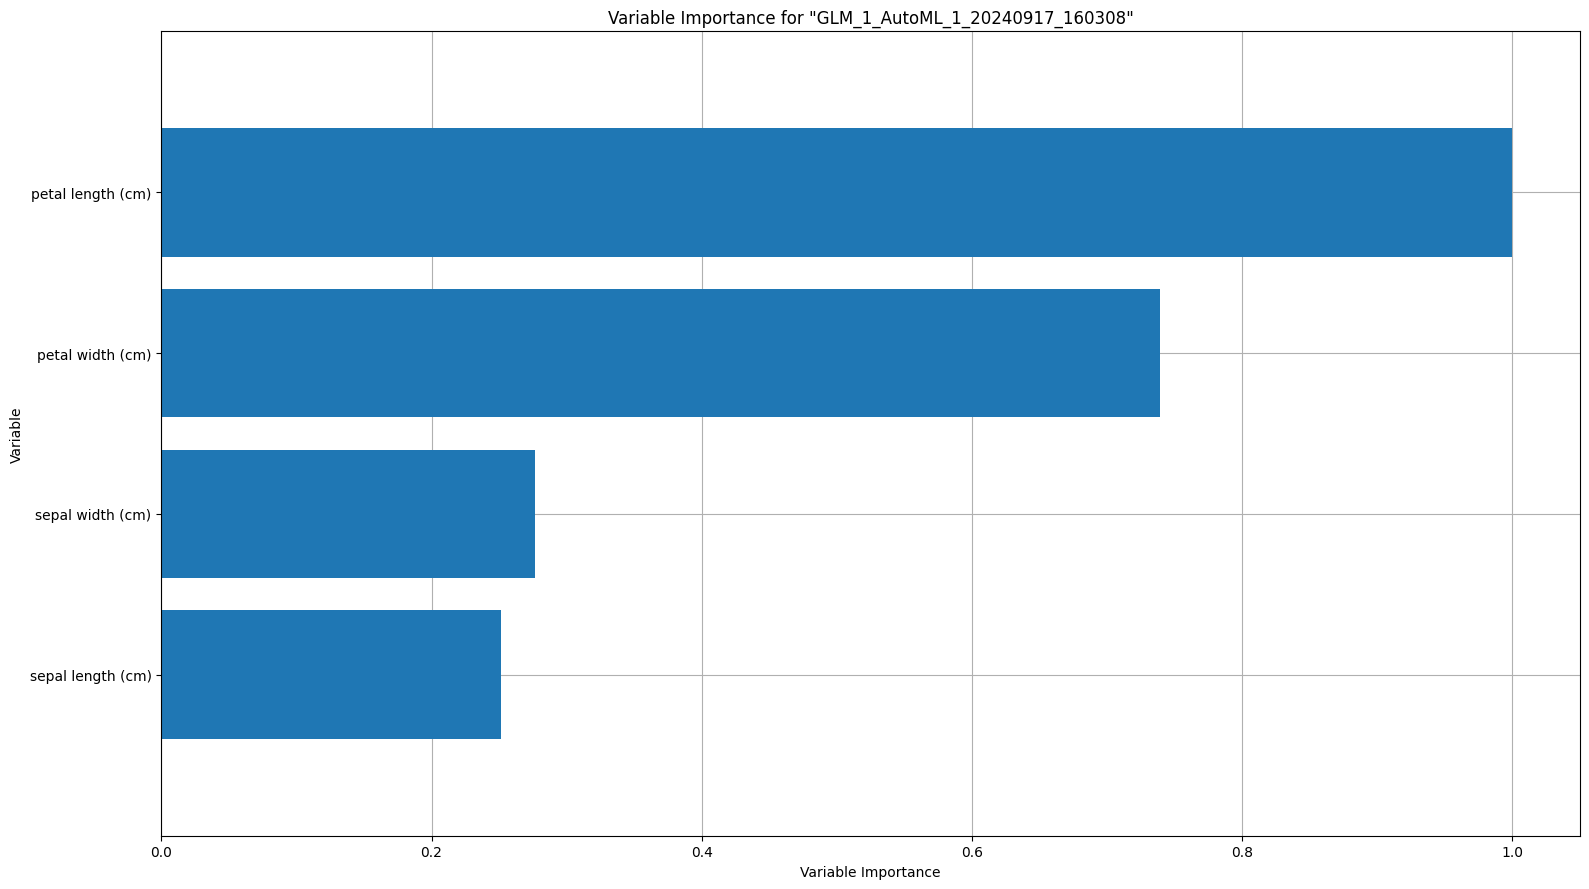

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

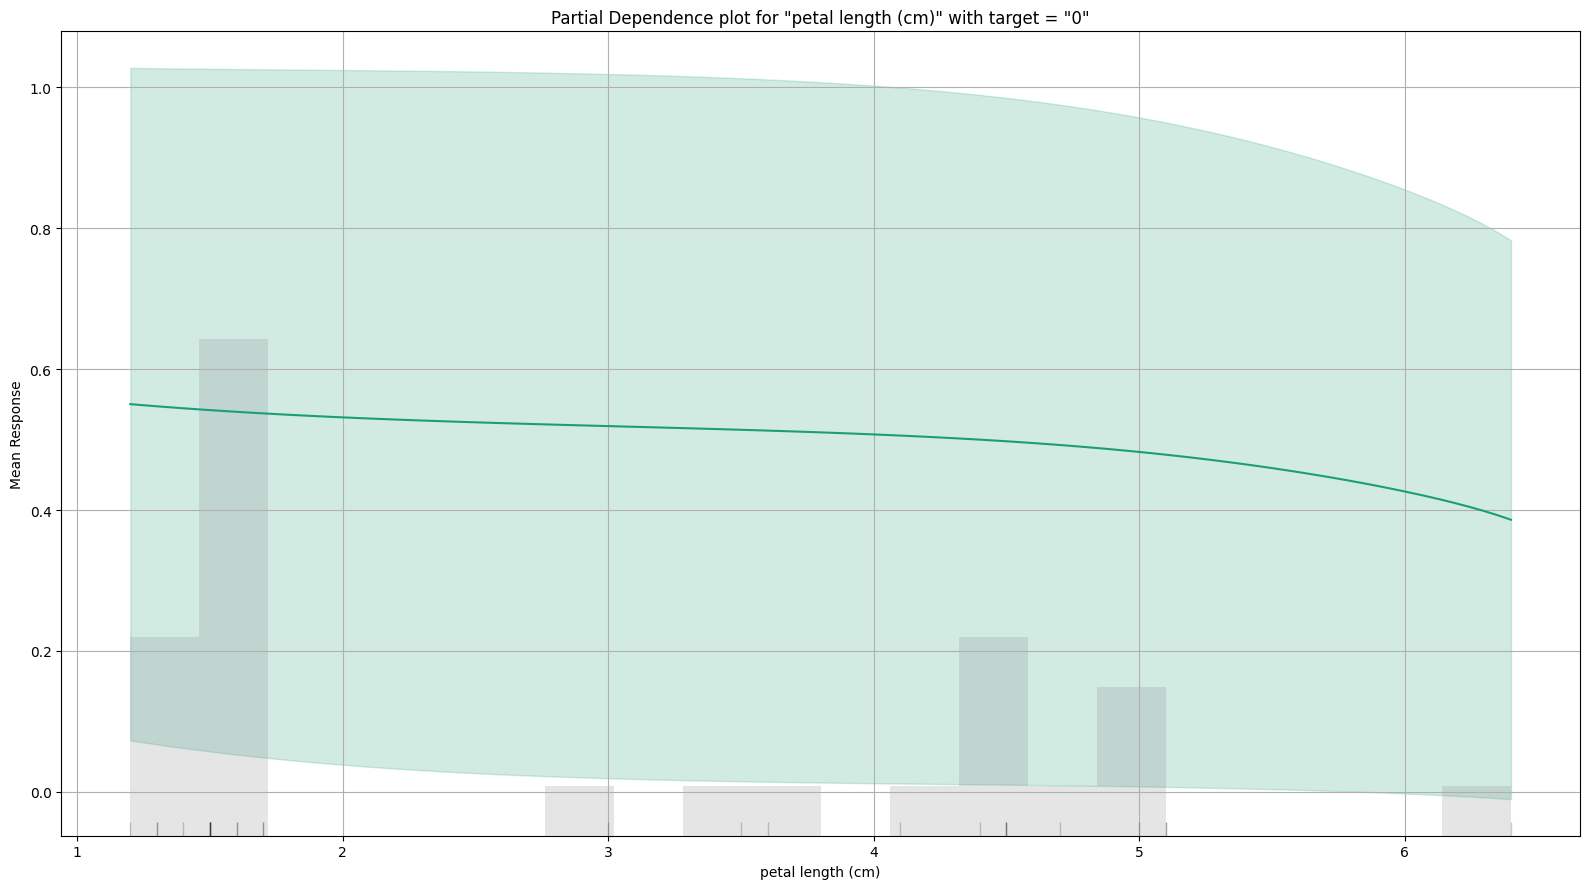

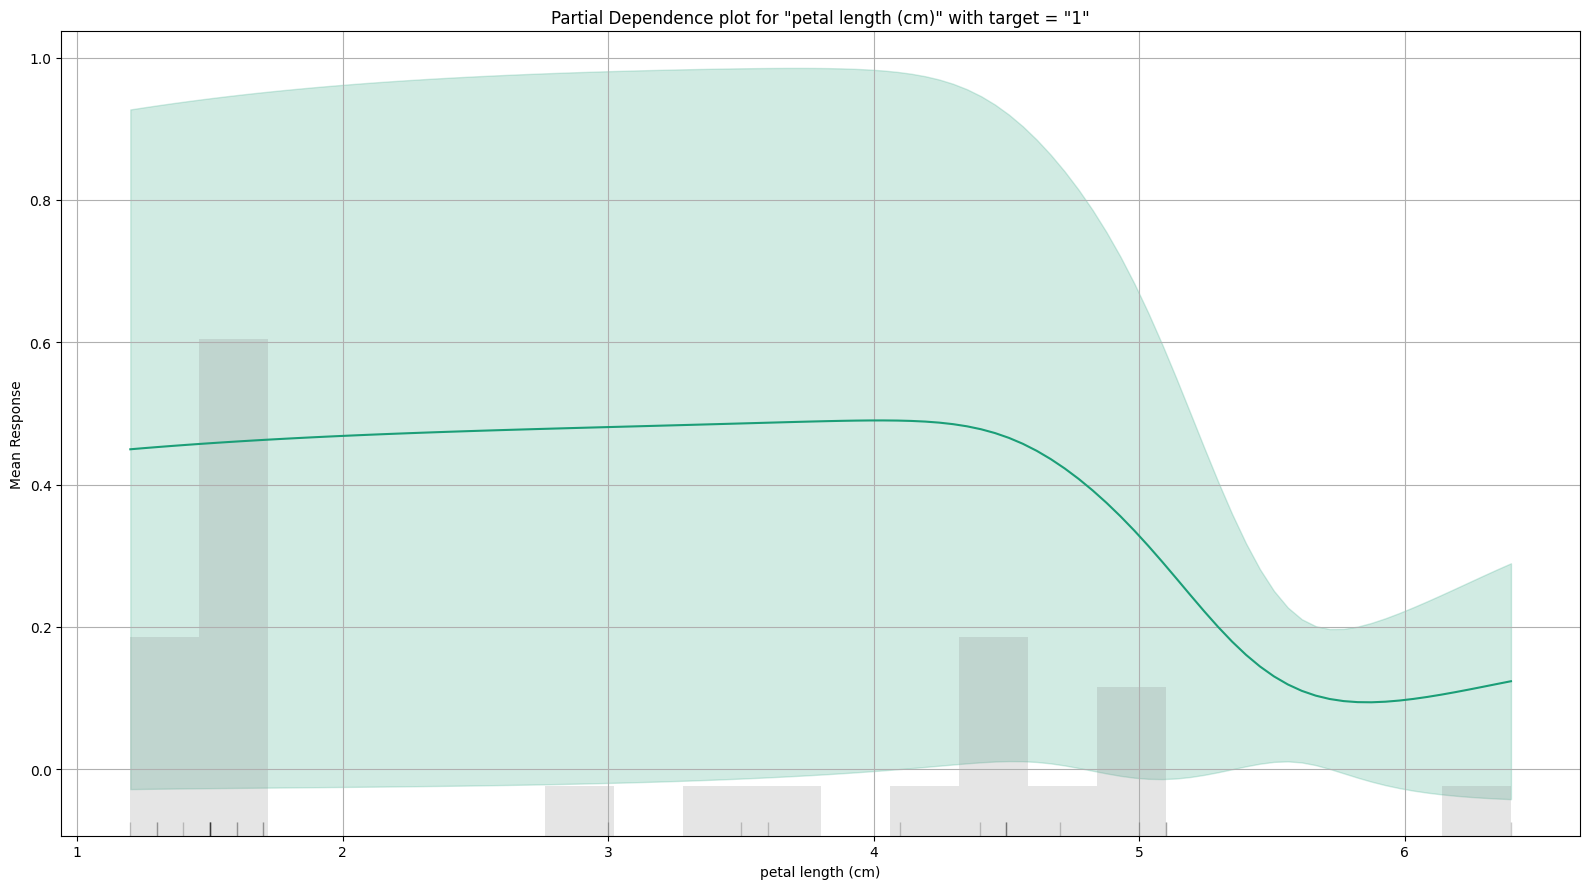

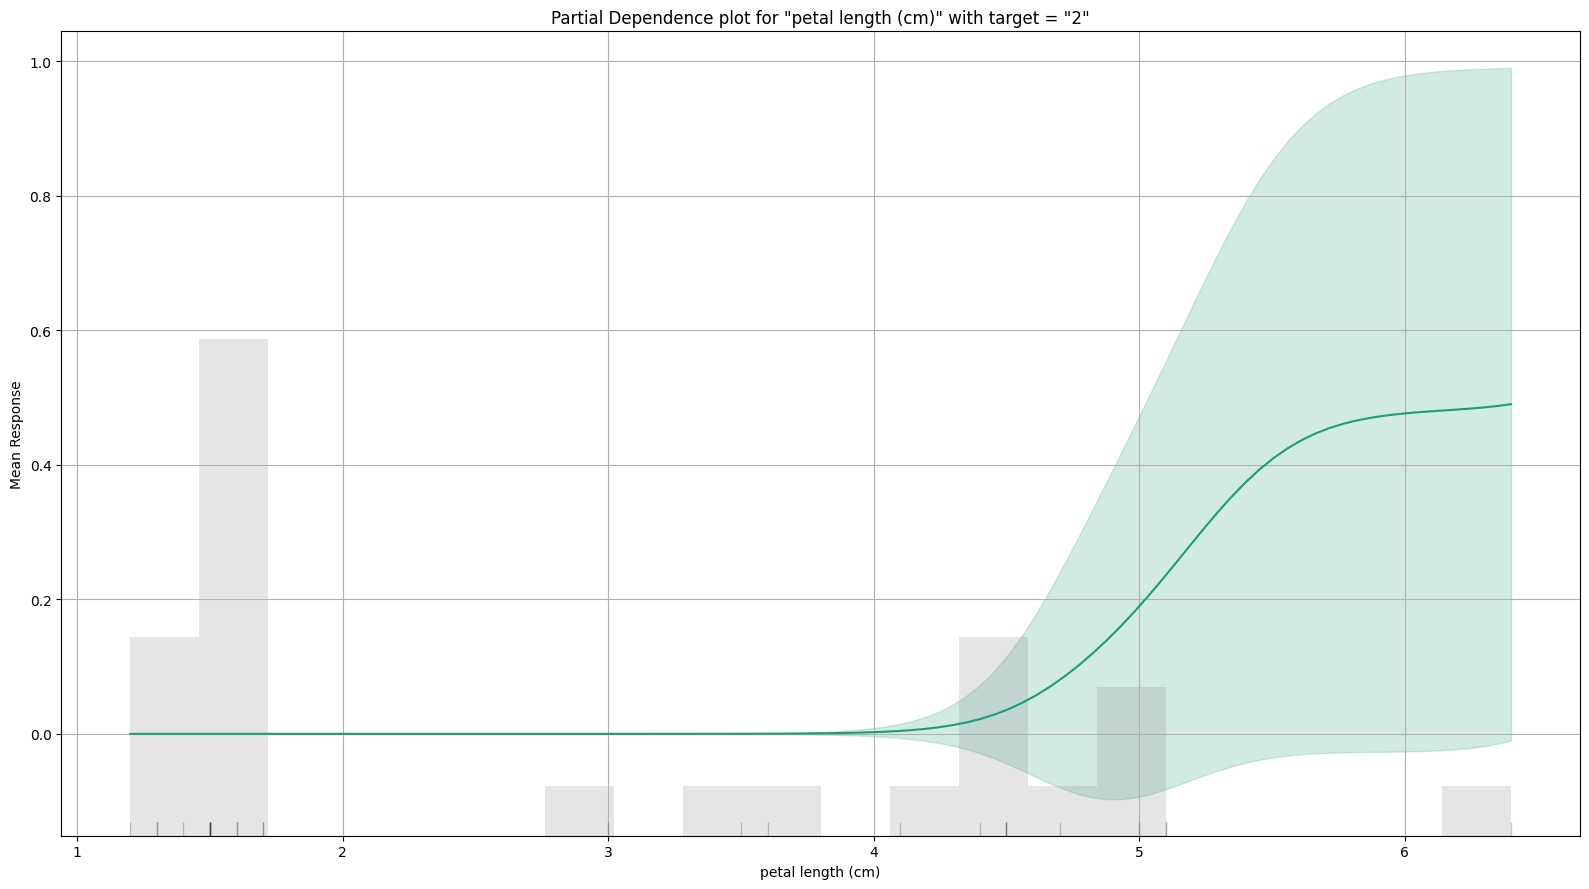

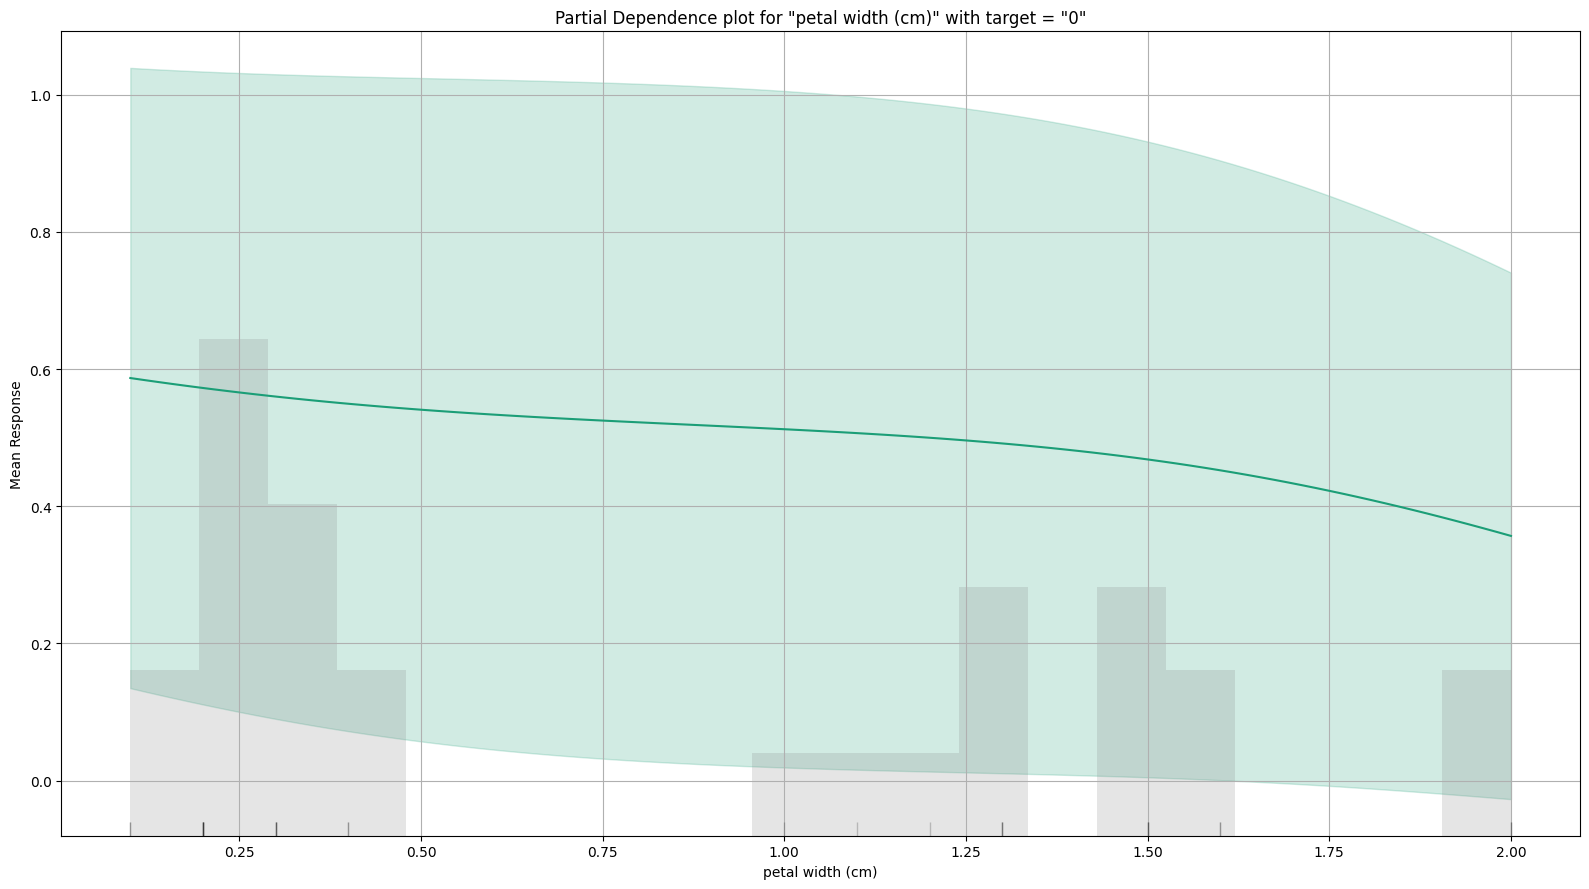

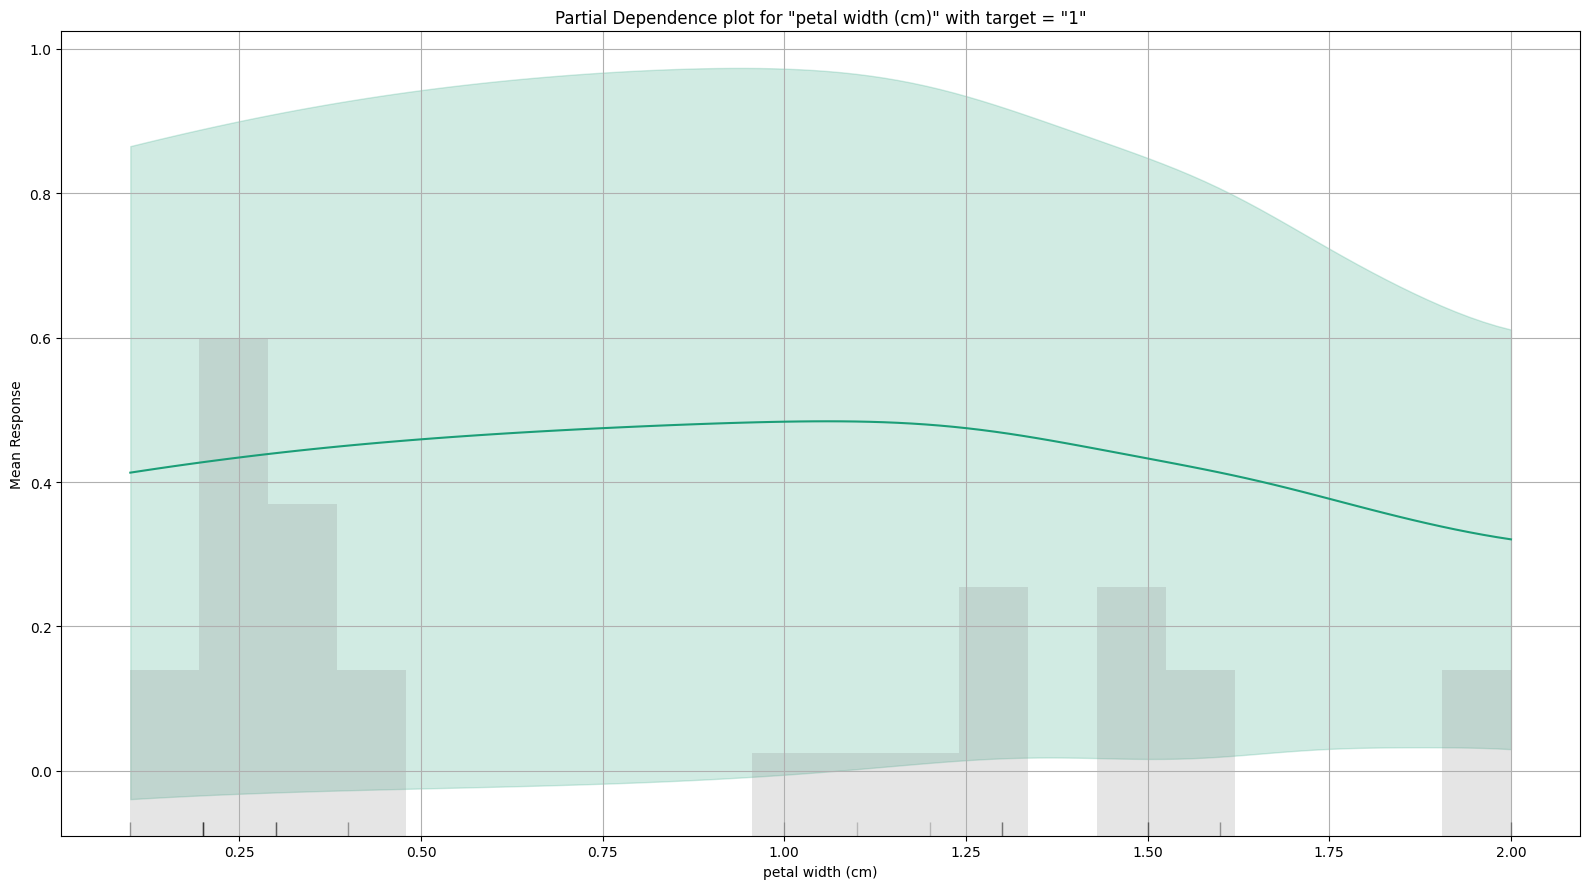

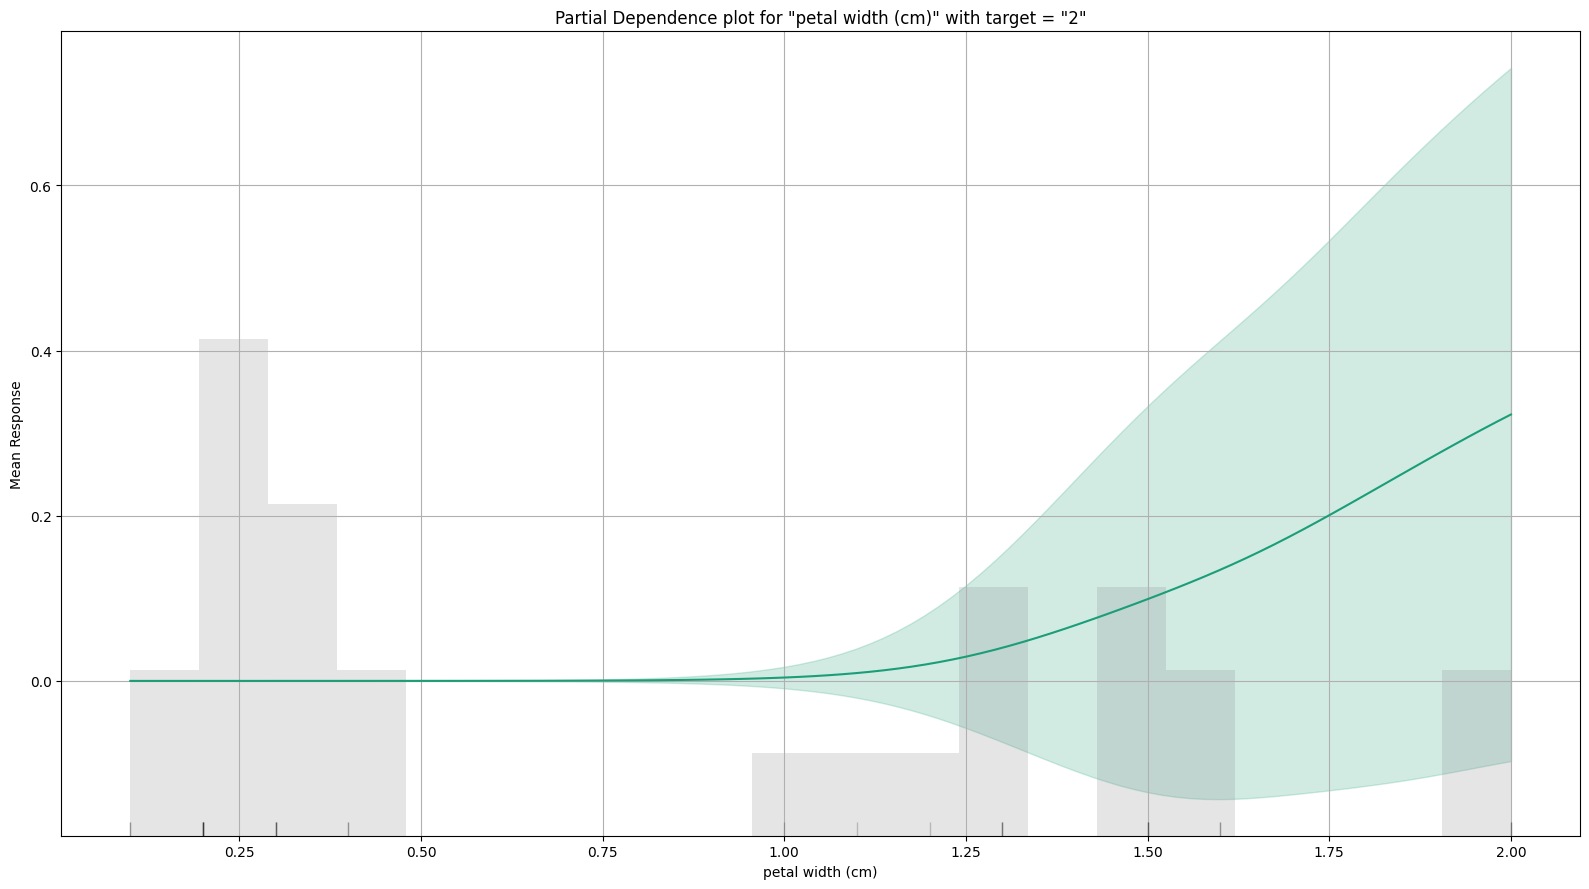

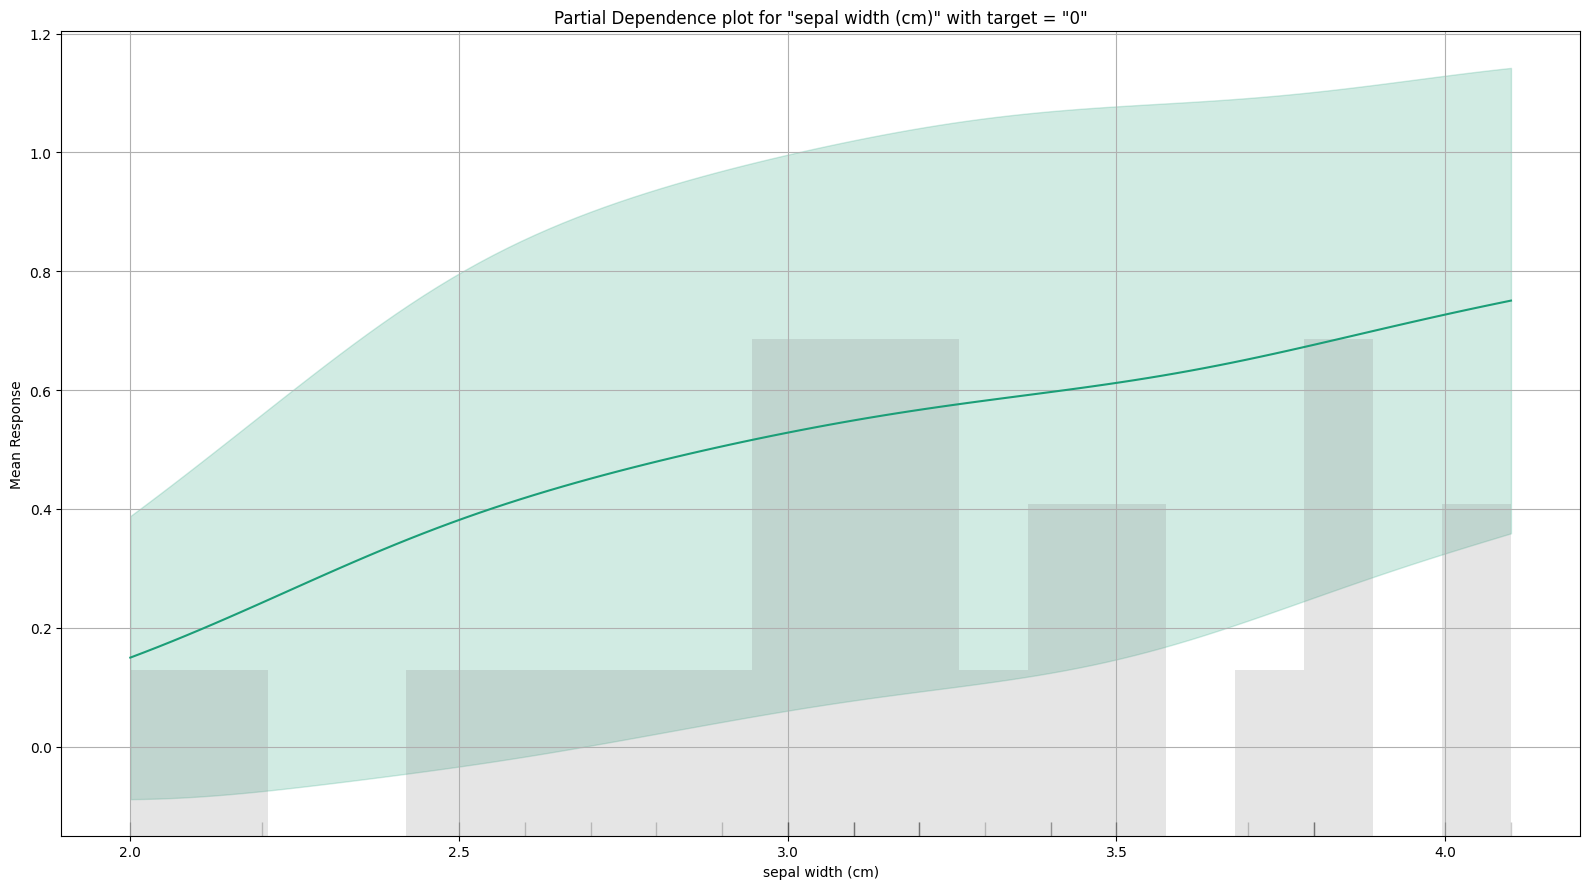

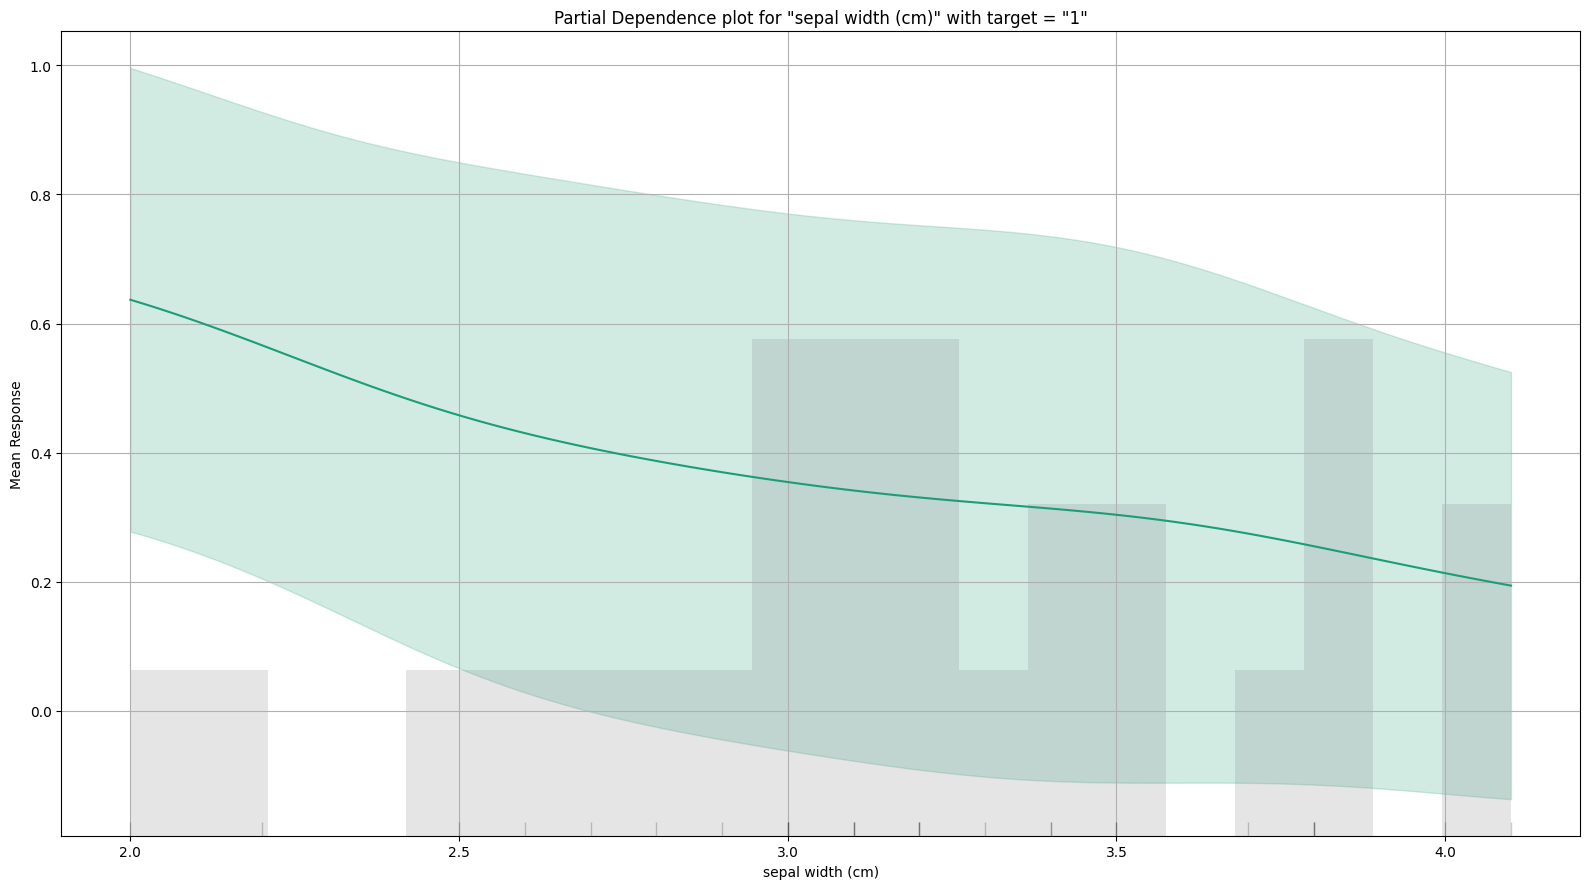

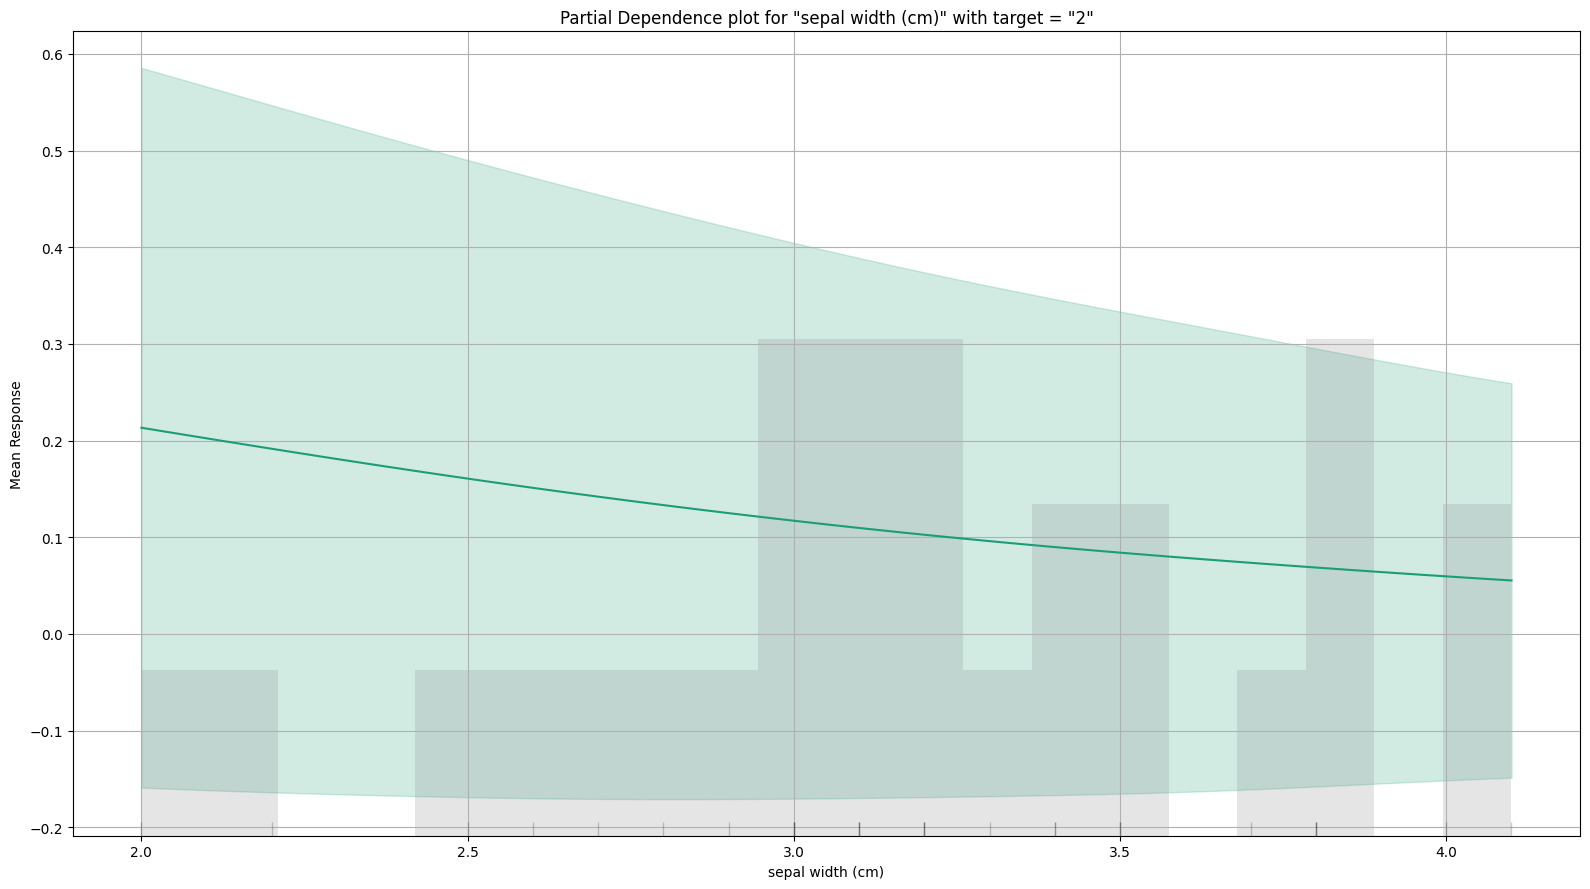

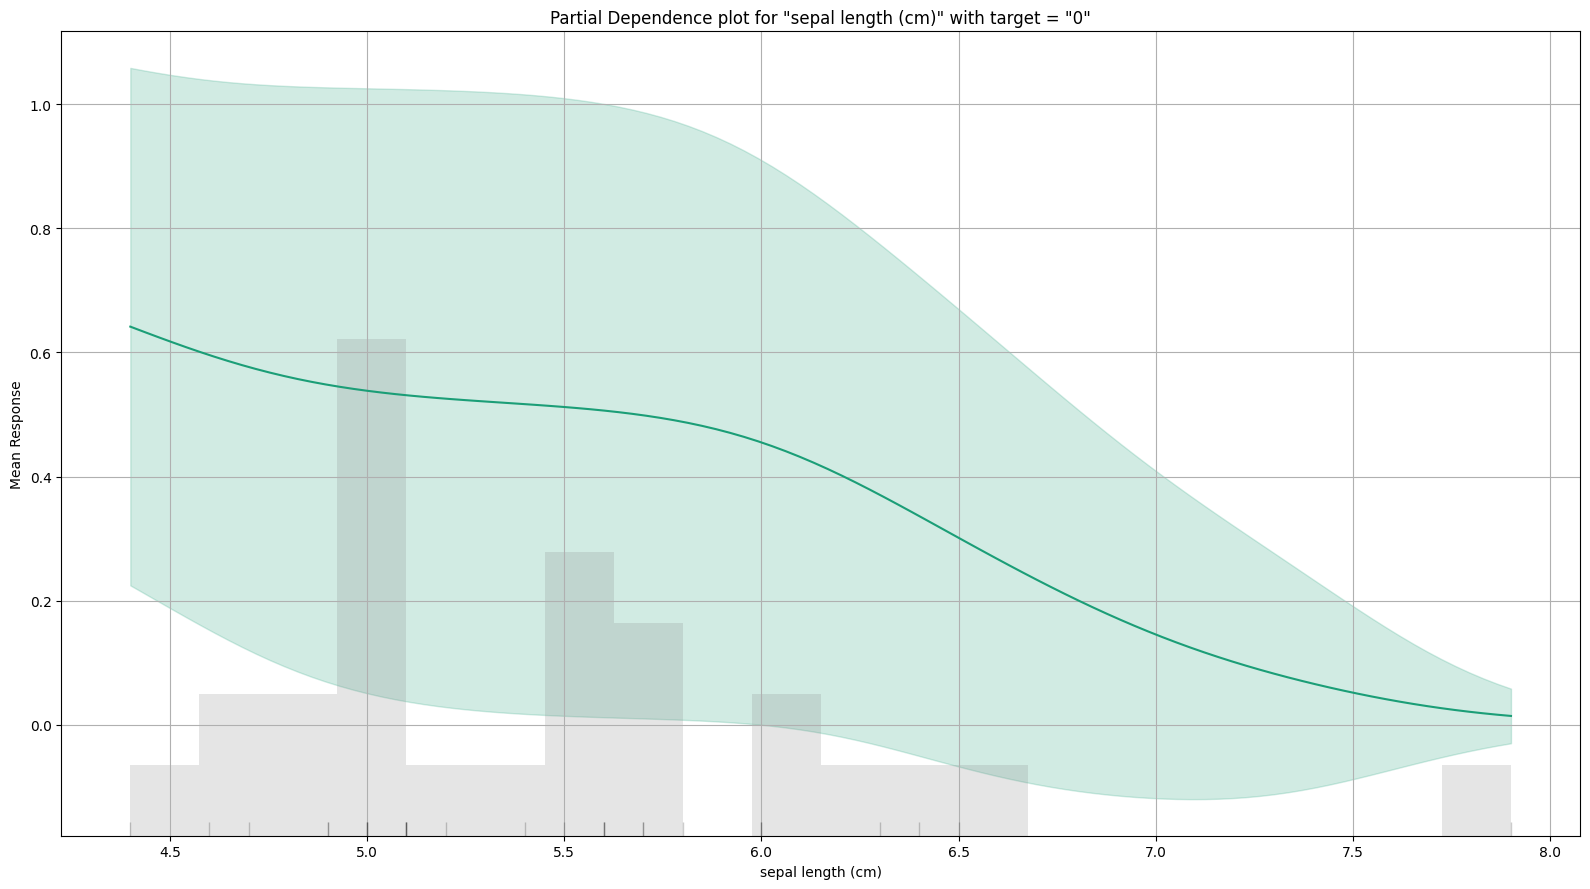

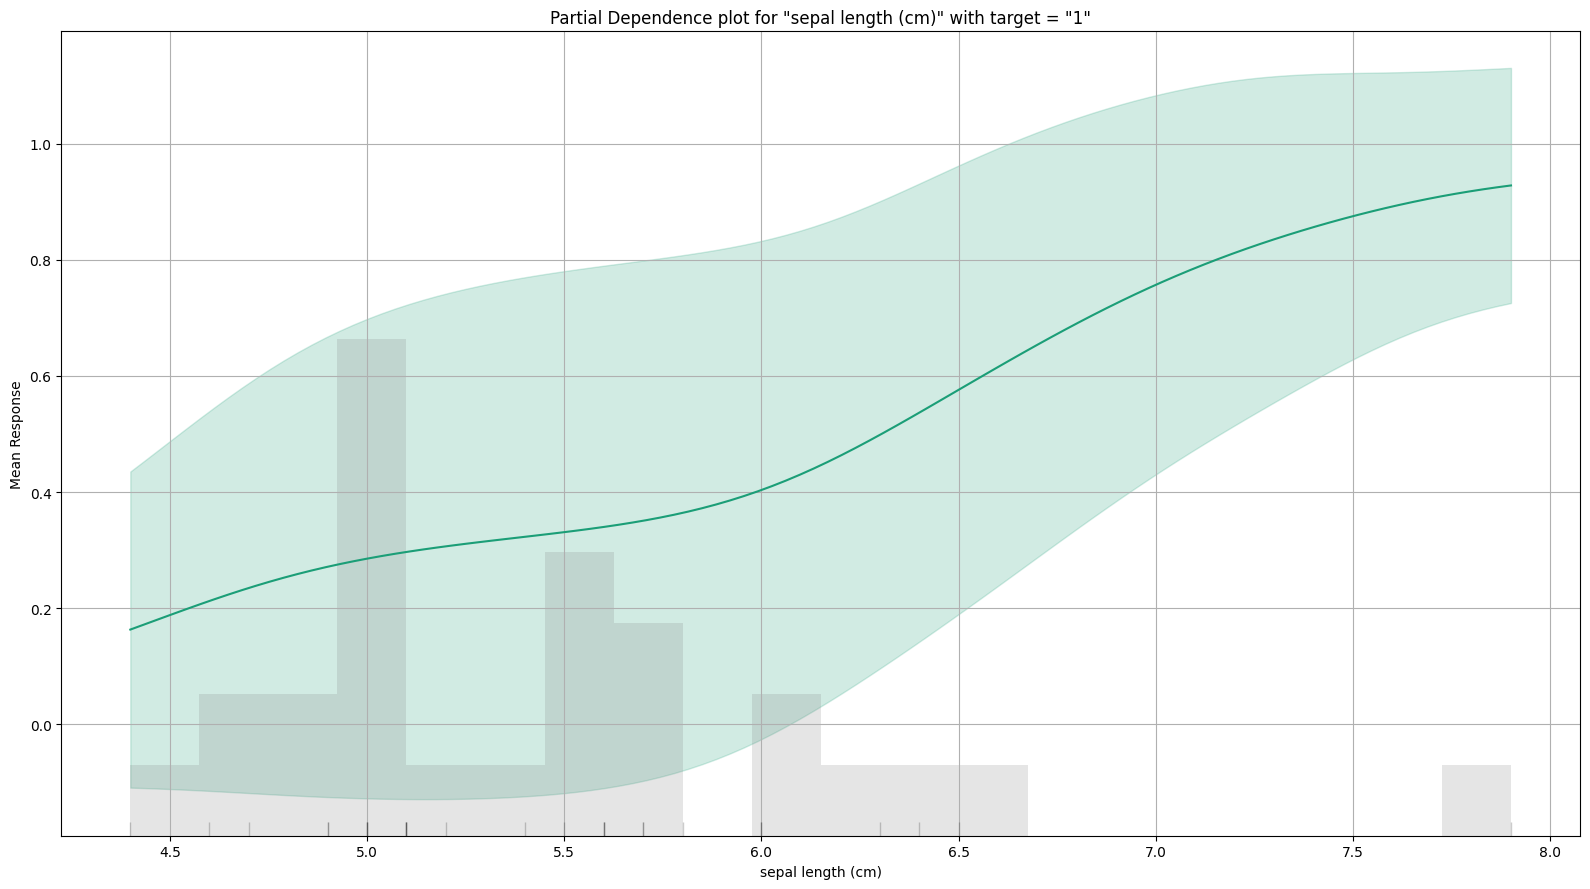

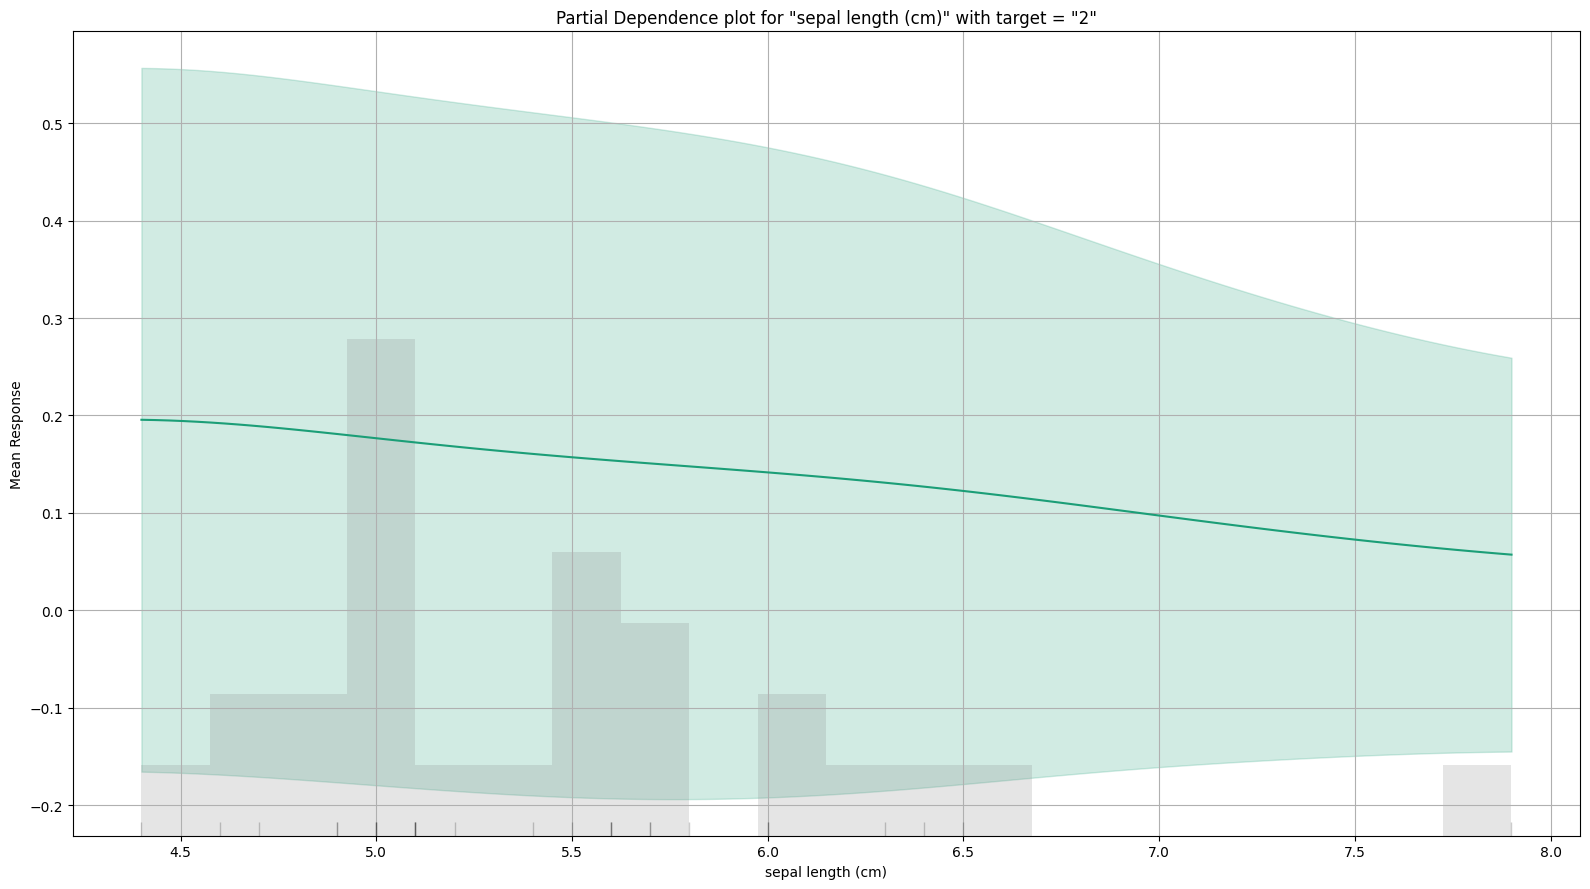



H2OExplanation([('confusion_matrix', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x79be92f3f4c0>), ('description', <h2o.explanation._explain.Description object at 0x79be92f3cc40>), ('subexplanations', H2OExplanation([('GLM_1_AutoML_1_20240917_160308', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x79be92f3fc10>), ('plots', H2OExplanation([('GLM_1_AutoML_1_20240917_160308', H2OTwoDimTable({'_table_header': 'Confusion Matrix', '_col_header': ['0', '1', '2', 'Error', 'Rate']}))]))]))]))])), ('learning_curve', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x79be92f3fa00>), ('description', <h2o.explanation._explain.Description object at 0x79be909c1330>), ('plots', H2OExplanation([('GLM_1_AutoML_1_20240917_160308', <h2o.plot._plot_result._MObject object at 0x79be909e3640>)]))])), ('varimp', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x79be957debf0>), ('description', <h2o.explanation._expla

In [37]:
# Explain model using H2O's built-in tools
from h2o.explanation import explain

# Use the validation set for explanations
explanations = explain(best_model, valid)
print(explanations)

# Evaluate the model on the validation set

In [38]:
performance = best_model.model_performance(valid)
print(performance)

ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.027918872969837707
RMSE: 0.16708941609161757
LogLoss: 0.0869208517628034
Null degrees of freedom: 26
Residual degrees of freedom: 12
Null deviance: 62.64095022080041
Residual deviance: 4.693725995191383
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error     Rate
---  ---  ---  --------  ------
14   0    0    0         0 / 14
0    9    1    0.1       1 / 10
0    0    3    0         0 / 3
14   9    4    0.037037  1 / 27

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.962963
2    1
3    1


# Explainable AI: Feature Importance for Random Forest

In [39]:
if isinstance(best_model, H2ORandomForestEstimator):
    feature_importances = best_model.varimp()
    feature_importances_df = feature_importances.as_data_frame()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='variable', y='relative_importance', data=feature_importances_df)
    plt.title("Feature Importances for Random Forest")
    plt.xticks(rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Relative Importance")
    plt.show()

# Save the best model

In [40]:
model_path = h2o.save_model(model=best_model, path="/content", force=True)
print(f"Model saved at: {model_path}")

Model saved at: /content/GLM_1_AutoML_1_20240917_160308


# Load the saved model

In [41]:
loaded_model = h2o.load_model(model_path)
print("Model loaded successfully.")

Model loaded successfully.


# Evaluate the loaded model

In [42]:
loaded_model_performance = loaded_model.model_performance(valid)
print(loaded_model_performance)

ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.027918872969837707
RMSE: 0.16708941609161757
LogLoss: 0.0869208517628034
Null degrees of freedom: 26
Residual degrees of freedom: 12
Null deviance: 62.64095022080041
Residual deviance: 4.693725995191383
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    Error     Rate
---  ---  ---  --------  ------
14   0    0    0         0 / 14
0    9    1    0.1       1 / 10
0    0    3    0         0 / 3
14   9    4    0.037037  1 / 27

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.962963
2    1
3    1


# Shutdown the H2O cluster

In [43]:
h2o.shutdown(prompt=False)

H2O session _sid_95f5 closed.


<ipython-input-43-02ff3806b010>:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)
